<a href="https://colab.research.google.com/github/mayurgurav-45/PYTHON-WORKSHOP/blob/main/Pandas_Advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
ipl = pd.read_csv(r'/content/ipl-matches.csv')
ipl.sample(2)
ipl

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri


In [4]:
ipl.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2'],
      dtype='object')

**Find all the final winners**

In [5]:
mask = ipl['MatchNumber'] == 'Final'
new_df = ipl[mask]
new_df[['Season','WinningTeam']]
ipl[ipl['MatchNumber'] == 'Final'][['Season','WinningTeam']]

,Season,WinningTeam
0,2022,Gujarat Titans
74,2021,Chennai Super Kings
134,2020/21,Mumbai Indians
194,2019,Mumbai Indians
254,2018,Chennai Super Kings
314,2017,Mumbai Indians
373,2016,Sunrisers Hyderabad
433,2015,Mumbai Indians
492,2014,Kolkata Knight Riders
552,2013,Mumbai Indians


**How many super over finishes have occured**

In [6]:
ipl[ipl['SuperOver']== 'Y'].shape[0]

14

**How many matches has csk won in kolkata**

In [7]:
ipl[(ipl['City'] == 'Kolkata') & (ipl['WinningTeam'] == 'Chennai Super Kings')].shape[0]

5

**Toss winner is match winner in percentage**

In [8]:
(ipl[ipl['TossWinner'] == ipl['WinningTeam']].shape[0]/ipl.shape[0])*100

51.473684210526315

In [9]:
def head_to_head_record(df, team_a, team_b):
    mask = ((df['Team1'] == team_a) & (df['Team2'] == team_b)) | ((df['Team1'] == team_b) & (df['Team2'] == team_a))
    matches = df[mask]

    team_a_wins = (matches['WinningTeam'] == team_a).sum()
    team_b_wins = (matches['WinningTeam'] == team_b).sum()
    total_matches = len(matches)

    return {'Total Matches': total_matches,
            f'{team_a} Wins': team_a_wins,
            f'{team_b} Wins': team_b_wins
           }

head_to_head_record(ipl, 'Kochi Tuskers Kerala', 'Deccan Chargers')


{'Total Matches': 1,
 'Kochi Tuskers Kerala Wins': np.int64(0),
 'Deccan Chargers Wins': np.int64(1)}

**Movies Data**

In [10]:
movies = pd.read_csv(r'/content/movies (1).csv')
movies.sample(4)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
781,Bin Bulaye Baraati,tt1947973,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Bin_Bulaye_Baraati,Bin Bulaye Baraati,Bin Bulaye Baraati,0,2011,133,Action|Comedy|Crime,3.9,225,Hazari and Murari rob the Police Commissioner'...,Petty robbers on the run from gangsters and po...,NaN,Naushaad Abbas|Rati Agnihotri|Shweta Bhardwaj|...,NaN,17 June 2011 (India)
283,Shortcut Safari,tt4505006,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Shortcut_Safari,Shortcut Safari,Shortcut Safari,0,2016,101,Adventure|Drama|Mystery,6.1,40,Shortcut Safari revolves around a group of urb...,'Shortcut Safari' is about adventures of a gro...,NaN,Jimmy Sheirgill|,NaN,29 April 2016 (India)
1330,Asambhav,tt0368580,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Asambhav,Asambhav,Asambhav,0,2004,139,Action|Adventure|Drama,3.4,534,Adit played by Arjun Rampal is in the Indian...,When the President of India is kidnapped by Ka...,NaN,Arjun Rampal|Naseeruddin Shah|Priyanka Chopra|...,1 nomination,23 July 2004 (India)
1308,Viruddh... Family Comes First,tt0420304,https://upload.wikimedia.org/wikipedia/en/e/ec...,https://en.wikipedia.org/wiki/Viruddh..._Famil...,Viruddh... Family Comes First,Viruddh... Family Comes First,0,2005,132,Drama|Family,7.1,1939,Vidyadhar Patwardhan lives a middle-class life...,An ordinary 60 plus couple - Vidhyadhar Patwar...,Family comes first,Amitabh Bachchan|Sharmila Tagore|John Abraham|...,2 nominations,22 July 2005 (India)


**Action movies with rating higher than 7.5**

In [11]:
condition_1 = movies['genres'].str.contains('Action')
condition_2 = movies['imdb_rating'] > 7.5
movies[condition_1 & condition_2]
len(movies[condition_1 & condition_2])

33

**Adding new column in dataframe**

In [12]:
movies['Country'] = 'India'
movies.head()

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date,Country
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA),India
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India),India
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA),India
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA),India
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India),India


In [13]:
movies.columns

Index(['title_x', 'imdb_id', 'poster_path', 'wiki_link', 'title_y',
       'original_title', 'is_adult', 'year_of_release', 'runtime', 'genres',
       'imdb_rating', 'imdb_votes', 'story', 'summary', 'tagline', 'actors',
       'wins_nominations', 'release_date', 'Country'],
      dtype='object')

**Dropping a Column**

In [14]:
movies.drop('Country',axis=1,inplace=True)

In [15]:
movies.columns

Index(['title_x', 'imdb_id', 'poster_path', 'wiki_link', 'title_y',
       'original_title', 'is_adult', 'year_of_release', 'runtime', 'genres',
       'imdb_rating', 'imdb_votes', 'story', 'summary', 'tagline', 'actors',
       'wins_nominations', 'release_date'],
      dtype='object')

**Man of the Matches/POTM in only Playoffs**

In [16]:
playoff_matches = ipl[~ipl['MatchNumber'].str.isdigit()]
potm_in_playoffs = playoff_matches['Player_of_Match']
potm_in_playoffs.value_counts()

,count
Player_of_Match,
F du Plessis,3
SK Raina,3
KA Pollard,3
JJ Bumrah,2
AB de Villiers,2
MK Pandey,2
M Vijay,2
A Kumble,2
YK Pathan,2


Toss decision plot

<Axes: ylabel='count'>

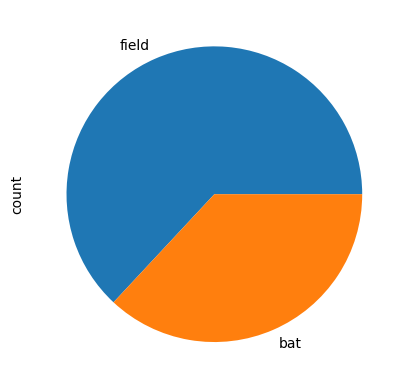

In [17]:
ipl['TossDecision'].value_counts().plot(kind='pie')